In [1]:
import pymaid
import pandas as pd
import matplotlib.pyplot as plt

# Set catmaid login instance
rm = pymaid.CatmaidInstance('https://neuropil.janelia.org/tracing/fafb/v14',
                           'fly',
                           'superfly',
                           'Token')

rm.max_threads = 10

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


# 1

In [2]:
excit = pymaid.find_neurons(annotations='Rclub_1807_Ex')
inhib = pymaid.find_neurons(annotations='Rclub_1807_In')

INFO  : Found 10 neurons matching the search parameters (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


INFO  : Found 10 neurons matching the search parameters (pymaid)


# 2

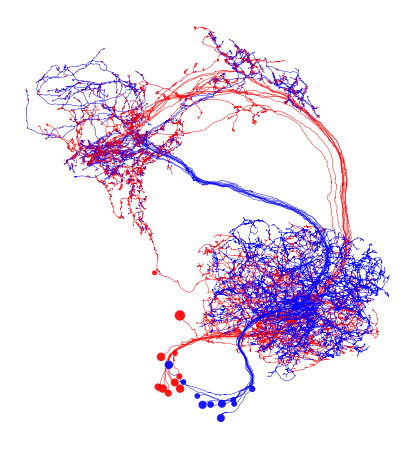

In [16]:
one = ['r']*len(inhib)
two = ['b']*len(excit)
color= one+two
fig, ax = pymaid.plot2d([excit, inhib], color=color)

# 3

Didn't really figure this out.

In [3]:
al = pymaid.get_volume('AL_R')
lh = pymaid.get_volume('LH_R')

al.color = (0,0.7,0,0.15)
lh.color = (0,0.7,0,0.15)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


In [24]:
# Ignore. Part of trials.
mb = pymaid.get_volume('MB_whole_R')
mb_vl = pymaid.get_volume('MB_VL_R') 
slp = pymaid.get_volume('SLP_R') 

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


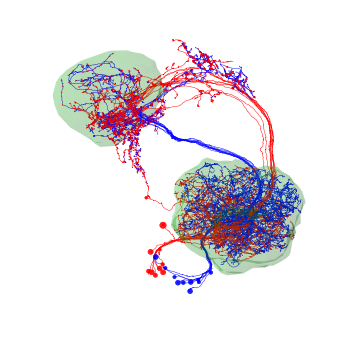

In [26]:
fig, ax = pymaid.plot2d([excit, inhib, lh, al], method='3d_complex', color = color)

# 4

In [27]:
neuron = pymaid.get_neuron(1722886)

What is this relation column? I am assuming it's the pre/post synapse

In [31]:
neuron.connectors.head(3)

,treenode_id,connector_id,relation,x,y,z
0,32941440,52206583,1,470688,211551,41000
1,33021294,41217595,1,483770,218232,48280
2,6328444,40474806,0,394213,167755,168520


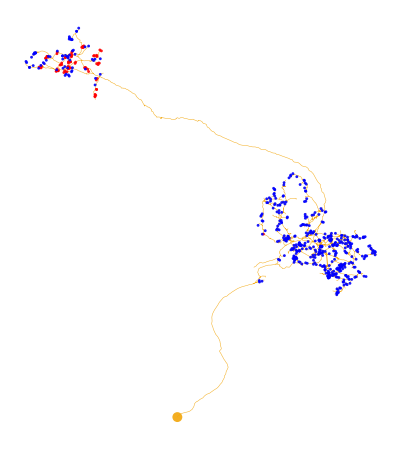

In [33]:
fig, ax = pymaid.plot2d(neuron, cn_size =8)

# 5

In [83]:
pymaid.cut_neuron(neuron, cut_node=['axon', 'dendrite'])

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,mPN mlALT VM5d+DC4+10 LTS 0.86 1532306 ASB,1722886,932,139,46,50,0,273.008391,NA,False
1,mPN mlALT VM5d+DC4+10 LTS 0.86 1532306 ASB,1722886,7256,406,284,290,0,1168.700173,NA,False
2,mPN mlALT VM5d+DC4+10 LTS 0.86 1532306 ASB,1722886,1083,3,3,5,2,322.748904,NA,True


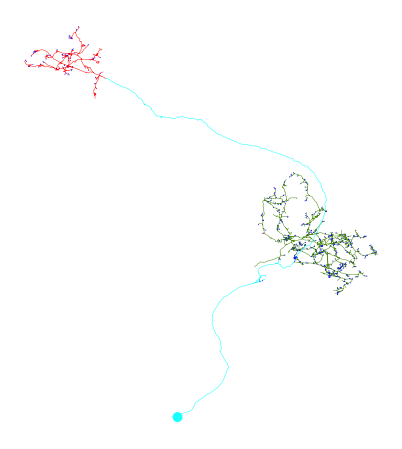

In [84]:
n1 = pymaid.cut_neuron(neuron, cut_node=['axon', 'dendrite'])
fig, ax =n1.plot2d()

# 6

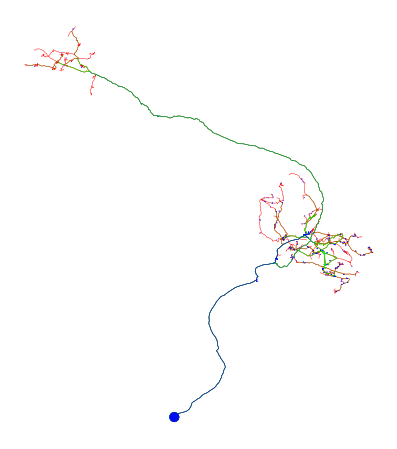

In [105]:
n1 = neuron.prune_by_strahler(to_prune=[1], inplace=False)
n2 = neuron.prune_by_strahler(to_prune=[1,2], inplace=False)
n3 = neuron.prune_by_strahler(to_prune=[1,2,3], inplace=False)
n4 = neuron.prune_by_strahler(to_prune=[1,2,3,4], inplace=False)
n5 = neuron.prune_by_strahler(to_prune=[1,2,3,4,5], inplace=False)

fig, ax = pymaid.plot2d([n1, n2, n3, n4, n5])



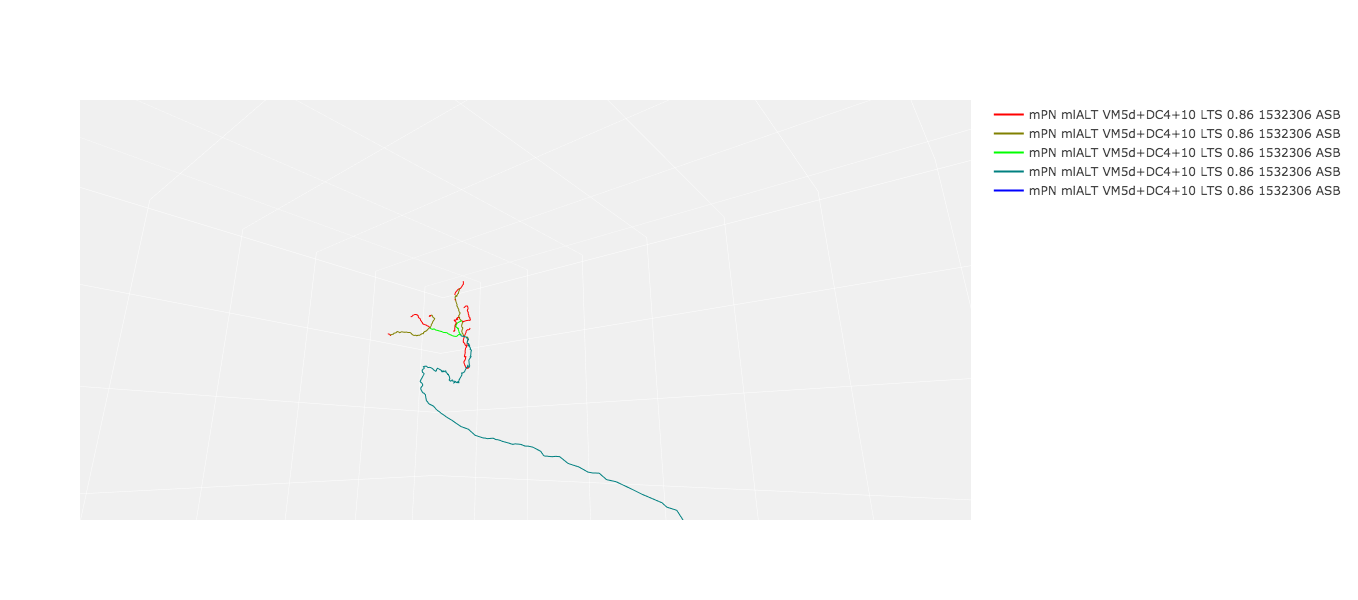

TypeError: 'NoneType' object is not iterable

In [110]:
fig, ax = pymaid.plot3d([n1, n2, n3, n4, n5])